# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Topaz Montague - [Project Repository Link](https://github.com/tfmontague/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

The focus of this project is [Navigating a Career Change into Data Science: A Step-by-Step Guide](https://www.thinkful.com/blog/navigating-a-career-change-into-data-science-a-step-by-step-guide/). This was chosen to explore to get an understanding of the overall sentiment of those that have pivoted their careers into Data Analysis or Science, to have insights into the level of complexity associated with this type of career change.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

##### Response to Question 1:

In [56]:
import requests
from bs4 import BeautifulSoup
import os

# Define the URL of the webpage
url = 'https://www.thinkful.com/blog/navigating-a-career-change-into-data-science-a-step-by-step-guide/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the div element that contains the article
    article_div = soup.find('div', class_="text")
    
    if article_div:
        # Create the data directory if it does not exist
        if not os.path.exists('data'):
            os.makedirs('data')
        
        # Define the path to the output HTML file
        output_file_path = os.path.join('data', 'article.html')
        
        # Write the article HTML to the file
        with open(output_file_path, 'w', encoding='utf-8') as file:
            file.write(str(article_div))
        print(f"Article saved to {output_file_path}")
    else:
        print("Article content not found.")
else:
    print(f"Failed to retrieve webpage: Status code {response.status_code}")


Article saved to data\article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)


##### Response to Question 2:

In [57]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Perform sentiment analysis
blob = TextBlob(article_text)
sentiment = blob.sentiment.polarity  # Gives a measure of the sentiment

# Print the polarity score
print(f"Sentiment Polarity Score: {sentiment}")

# Count the number of sentences by splitting on sentence terminators
sentences = [sent.strip() for sent in article_text.replace('?', '.').replace('!', '.').split('.') if sent.strip()]
print(f"Number of sentences in the article: {len(sentences)}")


Sentiment Polarity Score: 0.151489898989899
Number of sentences in the article: 58


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

##### Response to Question 3:

In [58]:
import os
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Tokenize and count words, filtering for nouns, adjectives, and verbs
words = [token.text.lower() for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'ADJ', 'VERB']]
word_freq = Counter(words)

# Determine the 5 most frequent tokens
most_common_tokens = word_freq.most_common(5)

# Prepare data for printing the most common tokens and their frequencies
most_common_table = [["Token", "Frequency"]]
most_common_table.extend(most_common_tokens)

# Print the common tokens and their frequencies in a table with borders
print("Common Tokens and Their Frequencies:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Optionally, prepare data for all tokens and their frequencies
full_table = [["Token", "Frequency"]]
full_table.extend(word_freq.items())

# Print all tokens and their frequencies in a table with borders
print("\nAll Tokens and Their Frequencies:")
print(tabulate(full_table, headers="firstrow", tablefmt="grid"))


Common Tokens and Their Frequencies:
+---------+-------------+
| Token   |   Frequency |
+=========+=============+
| data    |          27 |
+---------+-------------+
| science |          25 |
+---------+-------------+
| career  |           8 |
+---------+-------------+
| skills  |           8 |
+---------+-------------+
| field   |           6 |
+---------+-------------+

All Tokens and Their Frequencies:
+--------------------+-------------+
| Token              |   Frequency |
+====================+=============+
| exciting           |           1 |
+--------------------+-------------+
| nerve              |           1 |
+--------------------+-------------+
| racking            |           1 |
+--------------------+-------------+
| embark             |           1 |
+--------------------+-------------+
| career             |           8 |
+--------------------+-------------+
| change             |           2 |
+--------------------+-------------+
| venturing          |           1 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

##### Response to Question 4:

In [59]:
import spacy
from collections import Counter
import os
from bs4 import BeautifulSoup
from tabulate import tabulate

# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the path to the input HTML file
input_file_path = os.path.join('data', 'article.html')

# Read the HTML content from the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    article_html = file.read()

# Use BeautifulSoup to extract text content from HTML
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Extract lemmas and convert them to lower case
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Prepare data for the most common lemmas table
most_common_table = [["Lemma", "Frequency"]]
most_common_table.extend(most_common_lemmas)

# Prepare data for the full lemma frequency table
full_lemma_table = [["Lemma", "Frequency"]]
full_lemma_table.extend(sorted(lemma_freq.items()))

# Print the common lemmas with their frequencies in a table with borders
print("Most Common Lemmas:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Print all lemmas with their frequencies in a table with borders
print("\nAll Lemmas and Their Frequencies:")
print(tabulate(full_lemma_table, headers="firstrow", tablefmt="grid"))


Most Common Lemmas:
+---------+-------------+
| Lemma   |   Frequency |
+=========+=============+
| science |          26 |
+---------+-------------+
| datum   |          22 |
+---------+-------------+
| data    |          11 |
+---------+-------------+
| skill   |           9 |
+---------+-------------+
| career  |           8 |
+---------+-------------+

All Lemmas and Their Frequencies:
+-----------------------+-------------+
| Lemma                 |   Frequency |
+=======================+=============+
| ability               |           1 |
+-----------------------+-------------+
| abreast               |           1 |
+-----------------------+-------------+
| achievement           |           1 |
+-----------------------+-------------+
| acquire               |           2 |
+-----------------------+-------------+
| adapt                 |           1 |
+-----------------------+-------------+
| adaptdata             |           1 |
+-----------------------+-------------+
| age  

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

##### Response to question 5, part 1:

In [60]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list to hold sentence data and scores
sentence_scores = []

# Initialize a sentence counter
sentence_number = 1

# Tokenize into sentences and calculate score for each (score = number of tokens in the sentence)
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    sentence_scores.append([sentence_number, num_tokens])
    sentence_number += 1  # Increment the sentence counter

# Prepare and print the table using tabulate
print(tabulate(sentence_scores, headers=["Sentence Number", "Token Count"], tablefmt="grid"))


+-------------------+---------------+
|   Sentence Number |   Token Count |
+===================+===============+
|                 1 |            25 |
+-------------------+---------------+
|                 2 |            18 |
+-------------------+---------------+
|                 3 |            25 |
+-------------------+---------------+
|                 4 |            19 |
+-------------------+---------------+
|                 5 |            11 |
+-------------------+---------------+
|                 6 |            42 |
+-------------------+---------------+
|                 7 |            12 |
+-------------------+---------------+
|                 8 |            18 |
+-------------------+---------------+
|                 9 |            17 |
+-------------------+---------------+
|                10 |            20 |
+-------------------+---------------+
|                11 |            36 |
+-------------------+---------------+
|                12 |            16 |
+-----------

##### Response to Question 5, part 2:

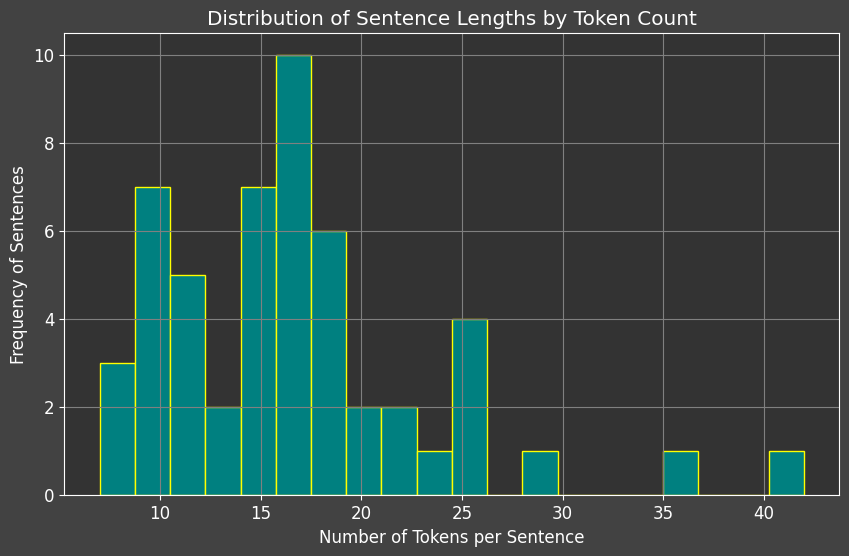

In [61]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set style and font properties for the plot
mpl.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'axes.facecolor': '#333333',  # dark background for plot area
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#424242'  # dark background for figure background
})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# List to hold scores (number of tokens in each sentence)
token_counts = []

# Tokenize into sentences and calculate token count for each
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    token_counts.append(num_tokens)

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=20, color='teal', edgecolor='yellow')  # Custom colors
plt.title('Distribution of Sentence Lengths by Token Count', color='white')
plt.xlabel('Number of Tokens per Sentence', color='white')
plt.ylabel('Frequency of Sentences', color='white')
plt.grid(True, color='gray')
plt.show()



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

##### Response to Question 6, part 1

In [62]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list to hold sentence data and scores
sentence_scores = []

# Initialize a sentence counter
sentence_number = 1

# Tokenize into sentences, process each sentence, and count the lemmas
for sent in doc.sents:
    # Generate a list of lemmas for each sentence, filtering out punctuation and spaces
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha and not token.is_stop]
    lemma_count = len(lemmas)
    sentence_scores.append([sentence_number, lemma_count])
    sentence_number += 1  # Increment the sentence counter

# Prepare and print the table using tabulate
print(tabulate(sentence_scores, headers=["Sentence Number", "Lemma Count"], tablefmt="grid"))


+-------------------+---------------+
|   Sentence Number |   Lemma Count |
+===================+===============+
|                 1 |            14 |
+-------------------+---------------+
|                 2 |            11 |
+-------------------+---------------+
|                 3 |            12 |
+-------------------+---------------+
|                 4 |            11 |
+-------------------+---------------+
|                 5 |             8 |
+-------------------+---------------+
|                 6 |            19 |
+-------------------+---------------+
|                 7 |             8 |
+-------------------+---------------+
|                 8 |            10 |
+-------------------+---------------+
|                 9 |            11 |
+-------------------+---------------+
|                10 |            13 |
+-------------------+---------------+
|                11 |            26 |
+-------------------+---------------+
|                12 |            10 |
+-----------

##### Response to Question 6, part 2

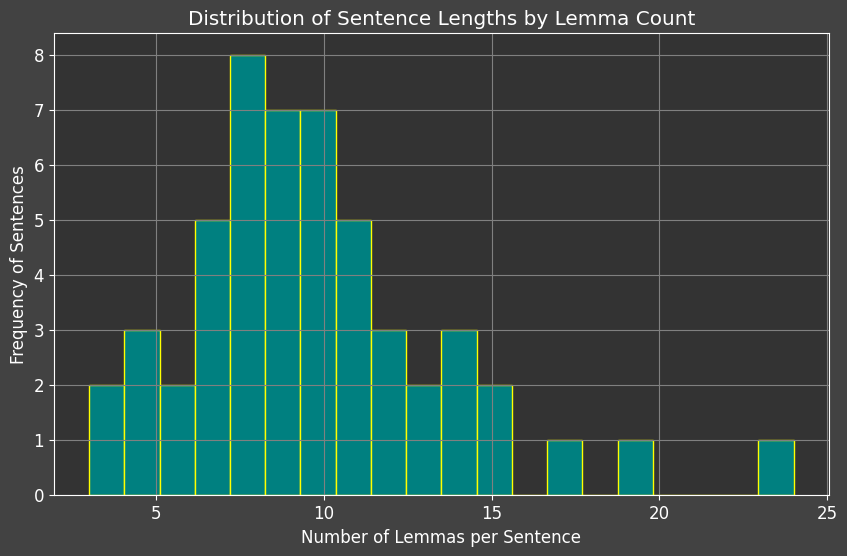

In [63]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set style and font properties for the plot
mpl.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'axes.facecolor': '#333333',  # dark background for plot area
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#424242'  # dark background for figure background
})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# List to hold scores (number of lemmas in each sentence)
lemma_counts = []

# Tokenize into sentences and calculate lemma count for each
for sent in doc.sents:
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha and not token.is_stop]  # Get lemmas, exclude stopwords
    lemma_count = len(set(lemmas))  # Use a set to count unique lemmas if desired, or just len(lemmas) for total
    lemma_counts.append(lemma_count)

# Plotting the histogram of lemma counts
plt.figure(figsize=(10, 6))
plt.hist(lemma_counts, bins=20, color='teal', edgecolor='yellow')  # Custom colors
plt.title('Distribution of Sentence Lengths by Lemma Count', color='white')
plt.xlabel('Number of Lemmas per Sentence', color='white')
plt.ylabel('Frequency of Sentences', color='white')
plt.grid(True, color='gray')
plt.show()


##### Question 7 and Inline Response

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 16
* Cutoff Score (lemmas): 10

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

##### Response to Question 8

In [64]:
import spacy
import textwrap

# Process the text with spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Given cutoff score for tokens
cutoff_score = 16

# Placeholder for the summary sentences
summary_sentences = []

# Loop through the sentences and collect those with token counts above the cutoff
# Stop after adding 6 sentences to the summary
for sent in doc.sents:
    if len(summary_sentences) < 6:  # Check if we already have 6 sentences
        token_count = len([token for token in sent if token.is_alpha])
        if token_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    else:
        break  # Exit the loop if we have reached 6 sentences

# Join the sentences to form the summary text
summary_text = ' '.join(summary_sentences)

# Wrap the summary text at 80 characters
wrapper = textwrap.TextWrapper(width=80)
wrapped_summary = wrapper.fill(text=summary_text)

print(wrapped_summary)




It can be exciting and nerve-racking to embark on a career change, particularly
when venturing into the dynamic and rapidly evolving data science landscape.
However, a career that combines technology, statistics, and domain expertise
presents a wealth of opportunities for career changers. It's crucial to approach
the transition strategically, and we’ve come up with some steps to illuminate
your path toward a rewarding career in data science. Start With a Foundation in
Introspection and Goal SettingAs you contemplate the shift into data science,
start with introspection. Consider how your current expertise can serve as a
bridge to the world of data science.•       Are you a natural problem solver?•
Do you possess a keen eye for patterns?•        Are you a skilled
communicator?Identifying these transferrable skills will lay the groundwork for
a smoother transition. Examine the various roles within the field, whether it's
a data analyst, machine learning engineer, or data engineer.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

##### Response to Question 9

In [65]:
from textblob import TextBlob
import nltk


summary = """
It can be exciting and nerve-racking to embark on a career change, particularly when venturing into the dynamic and rapidly evolving data science landscape. However, a career that combines technology, statistics, and domain expertise presents a wealth of opportunities for career changers. It's crucial to approach the transition strategically, and we’ve come up with some steps to illuminate your path toward a rewarding career in data science. Start With a Foundation in Introspection and Goal SettingAs you contemplate the shift into data science, start with introspection. Consider how your current expertise can serve as a bridge to the world of data science.• Are you a natural problem solver?• Do you possess a keen eye for patterns?• Are you a skilled communicator?Identifying these transferrable skills will lay the groundwork for a smoother transition. Examine the various roles within the field, whether it's a data analyst, machine learning engineer, or data engineer.
"""

# Create a TextBlob object for the summary
blob = TextBlob(summary)

# Calculate the polarity score
polarity = blob.sentiment.polarity

# Print the polarity score with an appropriate label
if polarity > 0:
    print(f"Summary sentiment: Positive (Polarity Score: {polarity:.2f})")
elif polarity < 0:
    print(f"Summary sentiment: Negative (Polarity Score: {polarity:.2f})")
else:
    print(f"Summary sentiment: Neutral (Polarity Score: {polarity:.2f})")



# Tokenize the summary into sentences
sentences = nltk.sent_tokenize(summary)

# Print the number of sentences
num_sentences = len(sentences)
print(f"Number of sentences in the summary: {num_sentences}")

Summary sentiment: Positive (Polarity Score: 0.12)
Number of sentences in the summary: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

##### Response to Question 10

In [66]:
import spacy
import textwrap

# Assume 'article_text' contains the full text of the article
# Process the text with spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Given cutoff score for lemmas
cutoff_score = 10

# Placeholder for the summary sentences
summary_sentences = []

# Loop through the sentences and collect those with lemma counts above the cutoff
# Stop after adding 6 sentences to the summary
for sent in doc.sents:
    if len(summary_sentences) < 6:  # Check if we already have 6 sentences
        # Get lemmas for the sentence, exclude punctuation, whitespace, and stopwords
        lemmas = [token.lemma_ for token in sent if token.is_alpha and not token.is_stop]
        lemma_count = len(set(lemmas))  # Count unique lemmas
        if lemma_count > cutoff_score:
            summary_sentences.append(sent.text.strip())
    else:
        break  # Exit the loop if we have reached 6 sentences

# Join the sentences to form the summary text
summary_text = ' '.join(summary_sentences)

# Wrap the summary text at 80 characters
wrapper = textwrap.TextWrapper(width=80)
wrapped_summary = wrapper.fill(text=summary_text)

print(wrapped_summary)


It can be exciting and nerve-racking to embark on a career change, particularly
when venturing into the dynamic and rapidly evolving data science landscape.
It's crucial to approach the transition strategically, and we’ve come up with
some steps to illuminate your path toward a rewarding career in data science.
Consider how your current expertise can serve as a bridge to the world of data
science.•       Are you a natural problem solver?•      Do you possess a keen
eye for patterns?•        Are you a skilled communicator?Identifying these
transferrable skills will lay the groundwork for a smoother transition. Lay the
Groundwork By Understanding the Data Science LandscapeBefore delving deeper,
familiarize yourself with the fundamental aspects of data science. This involves
gaining an understanding of•     Data collection•        Data cleaning•  Data
analysis•  Interpretation of resultsFamiliarize yourself with pivotal concepts
such as•    Machine learning•       Artificial intelligence•

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

##### Response to Question 11

In [67]:
from textblob import TextBlob
import nltk

# Summary generated with lemma scores
summary = """
It can be exciting and nerve-racking to embark on a career change, particularly when venturing into the dynamic and rapidly evolving data science landscape. It's crucial to approach the transition strategically, and we’ve come up with some steps to illuminate your path toward a rewarding career in data science. Consider how your current expertise can serve as a bridge to the world of data science.• Are you a natural problem solver?• Do you possess a keen eye for patterns?• Are you a skilled communicator? Identifying these transferrable skills will lay the groundwork for a smoother transition. Lay the Groundwork By Understanding the Data Science Landscape Before delving deeper, familiarize yourself with the fundamental aspects of data science. This involves gaining an understanding of• Data collection• Data cleaning• Data analysis• Interpretation of results Familiarize yourself with pivotal concepts such as• Machine learning• Artificial intelligence• Big data LTS link sees the data science landscape evolving into faster and smarter AI, graph technology, and blockchain. Speaking of educational foundations, one of the pivotal decisions on your journey is whether to pursue a formal degree or attend a data science bootcamp.
"""

# Create a TextBlob object for the summary
blob = TextBlob(summary)

# Calculate the polarity score
polarity = blob.sentiment.polarity

# Print the polarity score with an appropriate label
if polarity > 0:
    print(f"Summary sentiment: Positive (Polarity Score: {polarity:.2f})")
elif polarity < 0:
    print(f"Summary sentiment: Negative (Polarity Score: {polarity:.2f})")
else:
    print(f"Summary sentiment: Neutral (Polarity Score: {polarity:.2f})")

# Tokenize the summary into sentences
sentences = nltk.sent_tokenize(summary)

# Print the number of sentences
num_sentences = len(sentences)
print(f"Number of sentences in the summary: {num_sentences}")


Summary sentiment: Positive (Polarity Score: 0.12)
Number of sentences in the summary: 7


##### Question 12 and Inline Response

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

| Polarity Element | Polarity Score & Sentence Count | Insights |
|----------|----------|----------|
| Original Article | Polarity Score: 0.151489898989899; Number of Sentences: 58 | This score suggests that the overall sentiment of the article is mildly positive. Given the article's title "Navigating a Career Change into Data Science: A Step-by-Step Guide," a positive sentiment is reasonable, as it likely provides encouraging guidance and support for individuals considering a career shift into data science, which is typically viewed as a promising and rewarding field. |
| Token Summary | Polarity Score: 0.12; Number of Sentences: 6 | Both summaries have the same polarity score, slightly lower than the original article but still within the positive range. The fact that both summaries have fewer sentences (6 and 7 respectively) compared to the original (58 sentences) means they are condensed versions of the original content, capturing the main sentiments but potentially losing some nuances or less dominant sentiments that were present in the full text.|
| Lemma Summary | Polarity Score: 0.12; Number of Sentences: 7 | Both summaries have the same polarity score, slightly lower than the original article but still within the positive range. The fact that both summaries have fewer sentences (6 and 7 respectively) compared to the original (58 sentences) means they are condensed versions of the original content, capturing the main sentiments but potentially losing some nuances or less dominant sentiments that were present in the full text.|


#### Comparison & Analysis

The slight reduction in polarity scores in the summaries (0.12) compared to the original article (0.151489898989899) might indicate that some of the positive expressions or subtleties in the full text were lost during the summarization process. This is a common outcome in text summarization, especially if the summaries focus on condensing factual content over capturing emotive expressions.
Both summaries retaining the same polarity score (0.12) and being positive aligns with the intent of providing an optimistic and supportive overview of transitioning into a data science career.
The small decrease in sentiment strength could also be due to the algorithmic nature of how summaries were generated (either token-based or lemma-based), focusing on key content rather than the emotional tone. Summarization algorithms might prioritize informational content over sentiment, especially in an article that is practical and guide-like in nature.


#### Summary

In summary, the differences in polarity are minor but expected, given the challenges of maintaining the exact emotional tone in a condensed version of text. The consistent positive sentiment across all versions underscores the article's supportive and encouraging tone towards career change into data science.


##### Question 13 and Inline Response

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Evaluating the effectiveness of the summaries requires looking at how well they encapsulate the primary themes and motivational undertones of the full article, considering its structure and comprehensive guidance on making a career change into data science.

##### Token Summary
The token summary captures the introductory aspect of the article well, focusing on the initial excitement and the crucial aspects of beginning a career in data science. It emphasizes the introspective phase of considering a career change, highlighting the identification of transferrable skills and examining various roles within the data science field. However, it stops short of delving into deeper aspects of preparing for such a career, such as education choices, hands-on practice, and networking.

##### Lemma Summary
The lemma summary starts similarly but includes a broader overview by also touching upon the foundational understanding necessary for transitioning into data science, such as data collection, cleaning, and analysis, as well as key areas like machine learning and AI. Furthermore, it extends into educational pathways, discussing the choice between a formal degree and bootcamps, which are crucial decisions in the career change process.

##### Comparative Analysis
**Content Coverage:** The lemma summary offers a better spread of the critical content from the original article. It not only mentions the initial steps of introspection and skill assessment but also provides insights into the educational and practical learning aspects necessary for entering the data science field.

**Fulfilling the Article's Intent:** The original article aims to guide readers through the transition into a data science career comprehensively. The lemma summary aligns more closely with this objective by covering more ground regarding what to learn and how to prepare, thus giving a more rounded view compared to the token summary.

**Depth and Detail:** While both summaries capture the article's positive and encouraging tone, the lemma summary provides more detail on the data science landscape, which is crucial for readers to understand what they are stepping into. This additional information makes it more useful for someone genuinely considering this career path.

##### Conclusion
The lemma summary is better as it provides a more detailed and comprehensive overview of the journey into a data science career, aligning more closely with the article's intent of being a step-by-step guide. It balances the motivational aspects with practical steps more effectively than the token summary, making it more informative and actionable for readers.